<a href="https://colab.research.google.com/github/lkhart/company_bankruptcy_prediction/blob/main/bankruptcy_eda_and_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bankruptcy Exploratory Data Analysis**

This notebook includes exploratory analysis and supervised classification modeling of the Company Bankruptcy dataset from [Kaggle](https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction).



## Setup

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, RocCurveDisplay, auc, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier


In [3]:
# import dataset from github
url_data = 'https://raw.githubusercontent.com/lkhart/company_bankruptcy_prediction/main/data/data.csv'

data = pd.read_csv(url_data)

data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

## Exploratory Analysis

In [ ]:
# shape of dataset
data.shape

(6819, 96)

In [ ]:
# data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
# value counts for dependent variable: Bankrupt?
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

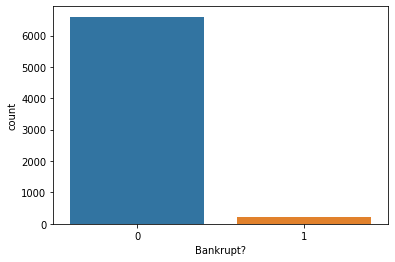

In [ ]:
# bar chart of 'Bankrupt?'
sns.countplot(data=data, x='Bankrupt?')

All independent variables appear to be quantitative (not categorical) according to the info summary. Histograms of the distributions for these variables:

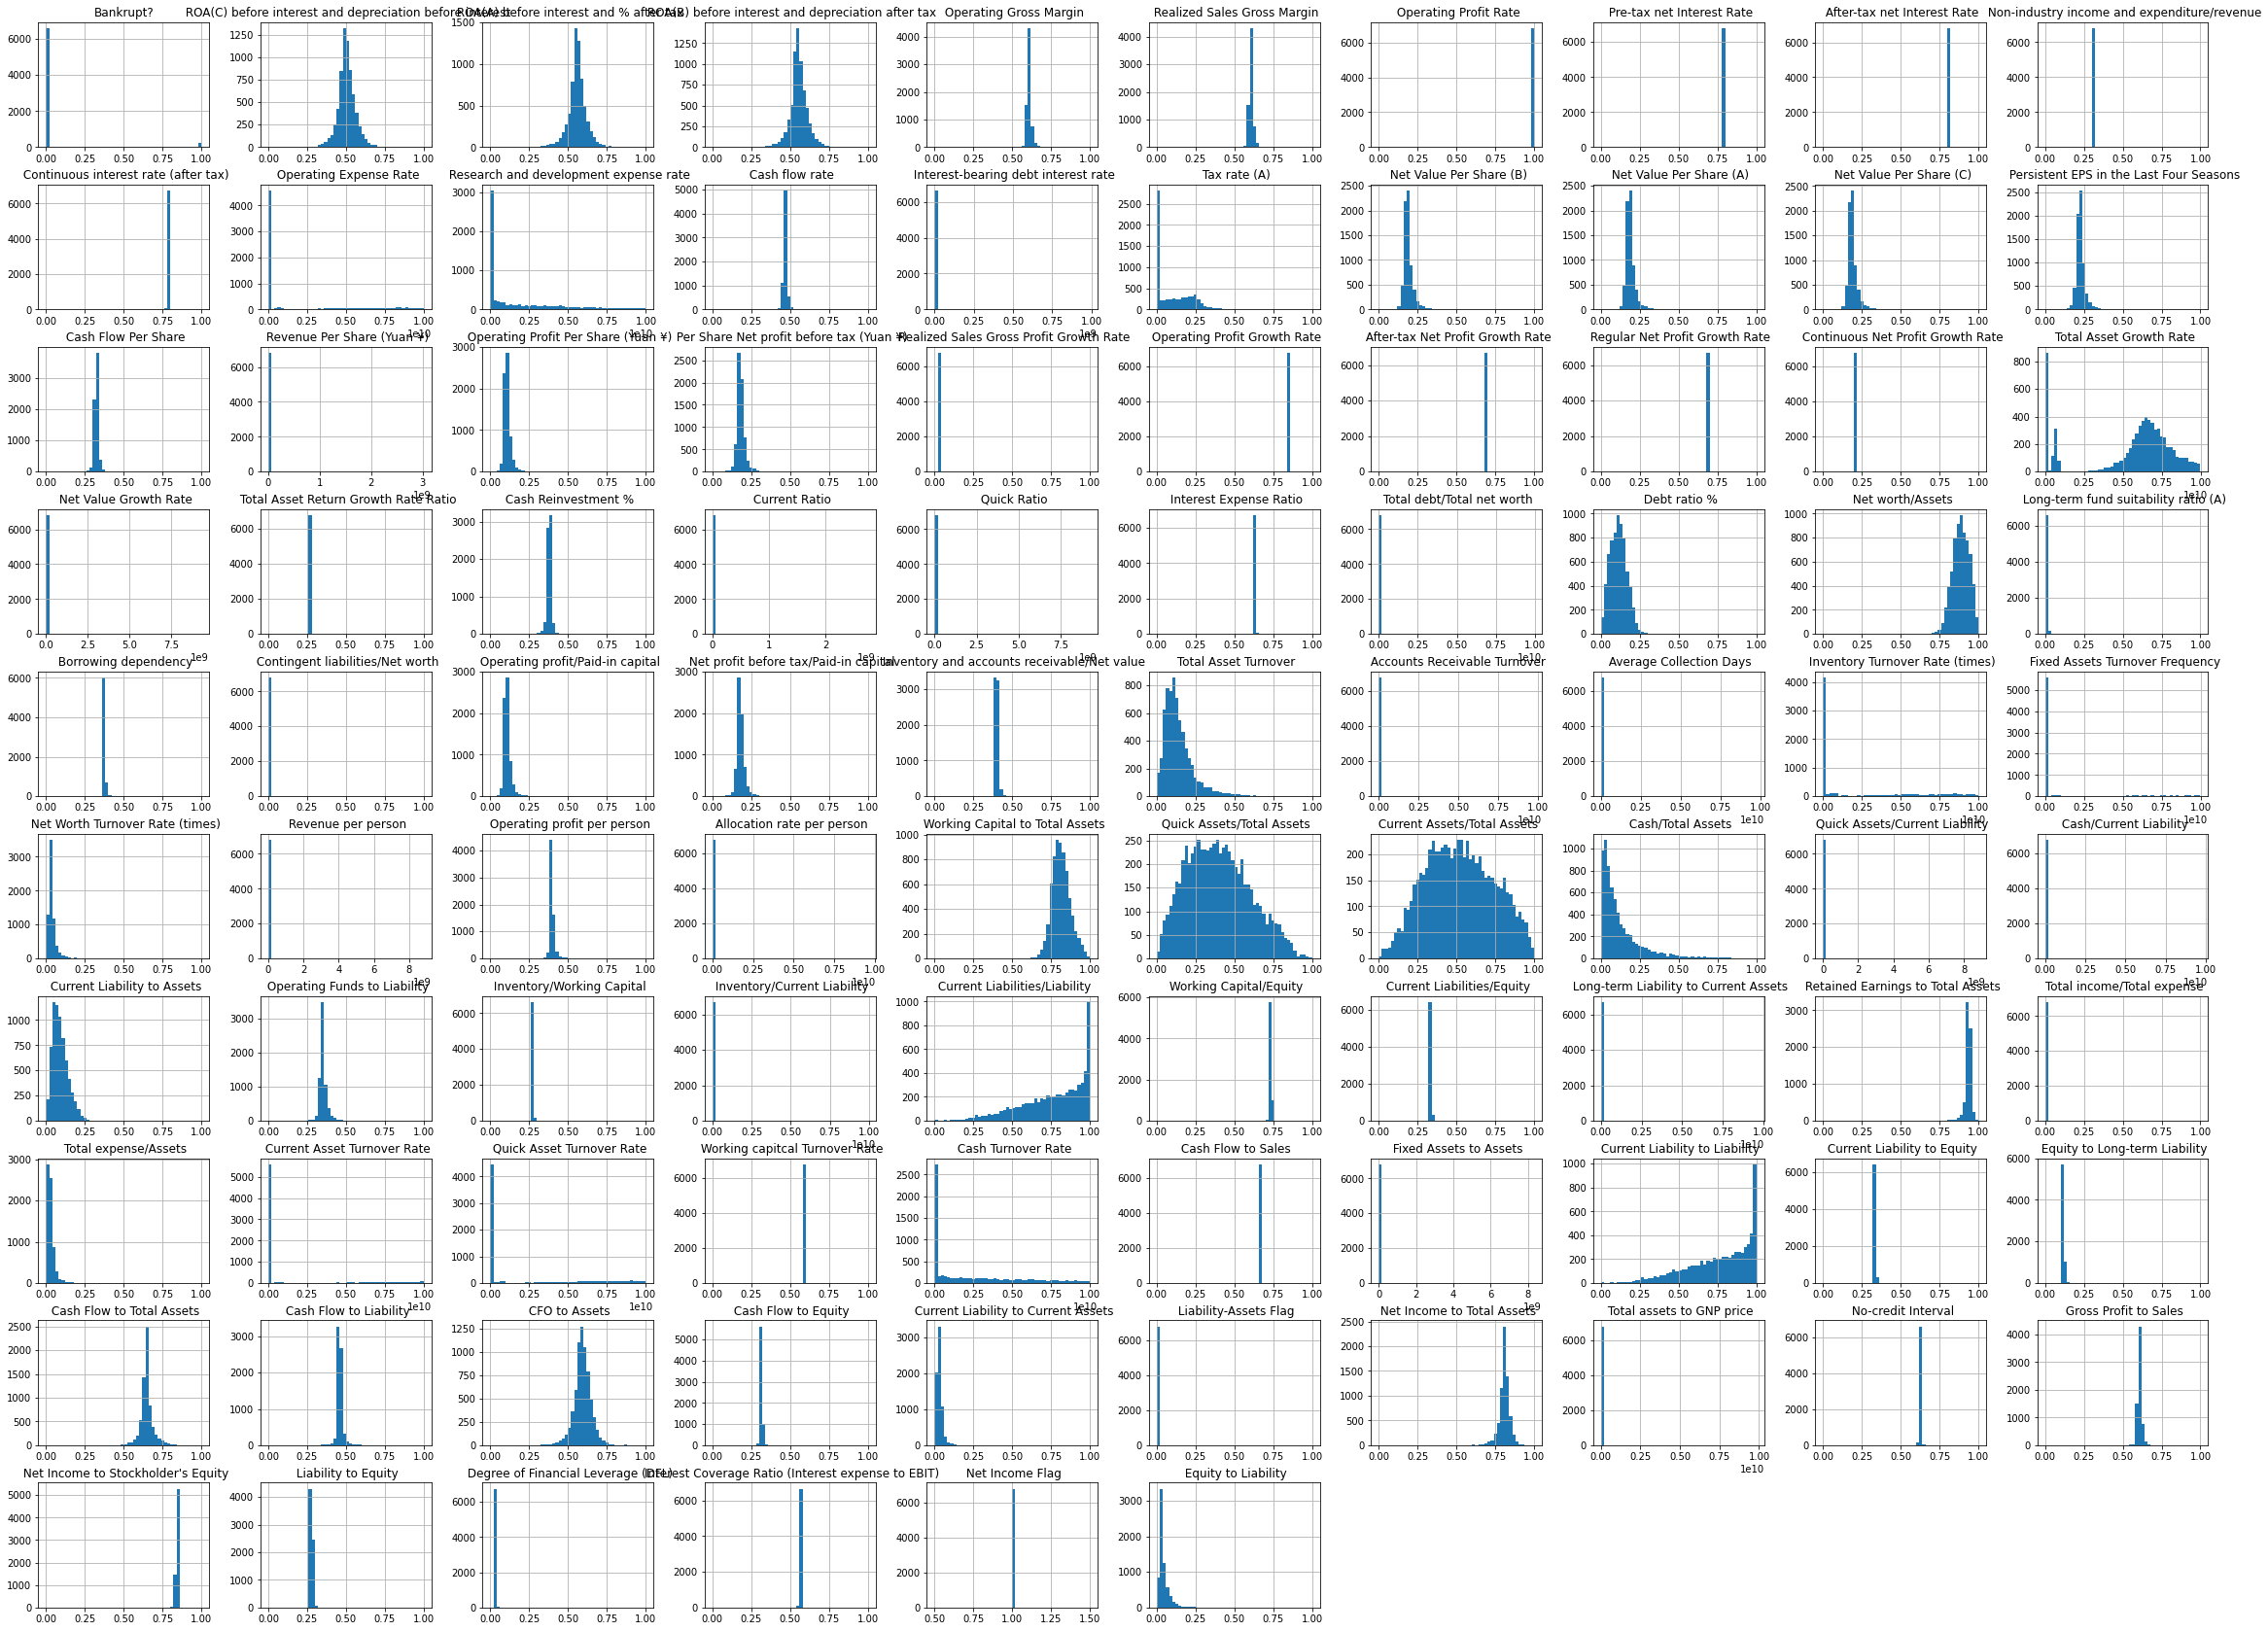

In [ ]:
data.hist(bins = 50, figsize = (40, 30))
plt.show()

In [ ]:
# generate correlation matrix for all variables
corr_matrix = data.corr()

# show correltation of each independent variable to the dependent variable
print(corr_matrix)

                                                    Bankrupt?  ...   Equity to Liability
Bankrupt?                                            1.000000  ...             -0.083048
 ROA(C) before interest and depreciation before...  -0.260807  ...              0.052416
 ROA(A) before interest and % after tax             -0.282941  ...              0.057887
 ROA(B) before interest and depreciation after tax  -0.273051  ...              0.056430
 Operating Gross Margin                             -0.100043  ...              0.120029
...                                                       ...  ...                   ...
 Liability to Equity                                 0.166812  ...             -0.159654
 Degree of Financial Leverage (DFL)                  0.010508  ...             -0.016739
 Interest Coverage Ratio (Interest expense to E...  -0.005509  ...             -0.008339
 Net Income Flag                                          NaN  ...                   NaN
 Equity to Liability 

In [ ]:
corrM_df = pd.DataFrame(corr_matrix)

br_corr = corrM_df['Bankrupt?'].sort_values(ascending=False)

pd.set_option('display.max_rows', 97)
print(br_corr)

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
 Liability to Equity                                        0.166812
 Current Liabilities/Equity                                 0.153828
 Current Liability to Equity                                0.153828
 Liability-Assets Flag                                      0.139212
 Total expense/Assets                                       0.139049
 Equity to Long-term Liability                              0.139014
 Cash/Current Liability                                     0.077921
 Inventory and accounts receivable/Net value                0.075278
 Fixed Assets Turnover Frequency                            0.072818
 Contingent liabilities/Net worth 

## Modeling - Supervised Learning Classification

Split the data into 80% training set and 20% validation set, then build three models:


*   SVM
*   Logistic Regression
*   Naive Bayes

Evaluate each of the models' assumptions. Conduct hyperparameter tuning for the SVM kernel. Evaluate goodness of fit metrics, including TPR, FPR, precision, recall, and accuracy on the training and validation sets. Build ROC and Precision/Recall graphs. Evaluate each model's performance on the validation set using the F1-score.




In [3]:
# set seed for reproducibility
np.random.seed(123)
# train-test split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size=0.20)

Applying MinMaxScaler on train and test sets: as we saw in the histograms of independent variables, some of our variables appear to resemble a normal distribution, but others have highly skewed distributions. MinMaxScaler is more appropriate than StandardScaler in cases where features have skewed distributions.

In [4]:
minmax = MinMaxScaler(feature_range=(0, 1))

X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

### Support-Vector Machine (SVM)


#### Hyperparemeter Tuning



In [ ]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
params = {'C': [1, 10, 100, 1000],
          'kernel': ['linear', 'rbf'],
          'gamma': [0.001, 0.0001],
          'class_weight': ['balanced', None]}

In [ ]:
grid_svm = GridSearchCV(SVC(), params, scoring = 'roc_auc', verbose = 1)

In [ ]:
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc', verbose=1)

In [ ]:
grid_svm.best_estimator_

SVC(C=1, class_weight='balanced', gamma=0.001, kernel='linear')

In [ ]:
grid_svm.best_score_

0.9336006307664715

#### SVM Final Model

In [ ]:
# fit svm model with best performing hyperparameters
svm_final = SVC(C=1, class_weight='balanced', gamma=0.001, kernel='linear').fit(X_train, y_train)

In [ ]:
# generate predictions on test data
svm_pred = svm_final.predict(X_test)

In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1327
           1       0.14      0.78      0.24        37

    accuracy                           0.87      1364
   macro avg       0.57      0.83      0.58      1364
weighted avg       0.97      0.87      0.91      1364



In [ ]:
print('Accuracy: ', accuracy_score(y_test, svm_pred))

Accuracy:  0.8673020527859238


In [ ]:
svm_cm = confusion_matrix(y_test, svm_pred)
print(svm_cm)

[[1154  173]
 [   8   29]]


In [ ]:
# from confusion matrix: count of each prediction result
svm_tn = svm_cm[0][0]
print('True Negatives: ', svm_tn)
svm_fn = svm_cm[1][0]
print('False Negatives: ', svm_fn)
svm_tp = svm_cm[1][1]
print('True Positives: ', svm_tp)
svm_fp = svm_cm[0][1]
print('False Positives: ', svm_fp)

True Negatives:  1154
False Negatives:  8
True Positives:  29
False Positives:  173


In [ ]:
# tpr
print('TPR: ', svm_tp/(svm_tp + svm_fn))
# fpr
print('FPR: ', svm_fp/(svm_fp + svm_tn))
# tnr
print('TNR: ', svm_tn/(svm_tn + svm_fp))
# fnr
print('FNR: ', svm_fn/(svm_fn + svm_tp))

TPR:  0.7837837837837838
FPR:  0.1303692539562924
TNR:  0.8696307460437076
FNR:  0.21621621621621623


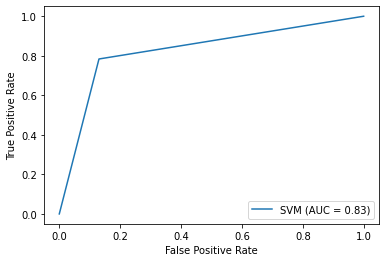

In [ ]:
# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_pred)
roc_auc = auc(fpr, tpr)

rocdisplay = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM')
rocdisplay.plot()

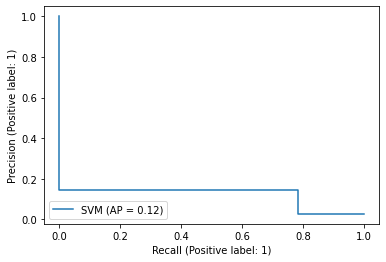

In [ ]:
# generate precision-recall graph
prdisplay = PrecisionRecallDisplay.from_predictions(y_test, svm_pred, name='SVM')

#### SVM Final Model Summary

The SVM model did not perform well on this imbalanced dataset, even with the best performing hyperparameters applied. This model had a high rate of false positives, as evidenced by the low precision score of 14% among true-bankrupt companies. 

### Logistic Regression


#### Hyperparameter Tuning

In [ ]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params = {'C': [1, 10, 100, 1000],
          'class_weight': ['balanced', None],
          'max_iter': [10000, 100000]}

In [ ]:
grid_logistic = GridSearchCV(LogisticRegression(), params, scoring = 'roc_auc', verbose = 1)

In [ ]:
grid_logistic.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'max_iter': [10000, 100000]},
             scoring='roc_auc', verbose=1)

In [ ]:
grid_logistic.best_estimator_

LogisticRegression(C=1, class_weight='balanced', max_iter=10000)

In [ ]:
grid_logistic.best_score_

0.9330261267499683

#### Logistic Regression Final Model

In [ ]:
# fit logistic regression model with best performing hyperparameters
lr_final = LogisticRegression(C=1, class_weight='balanced', max_iter=10000).fit(X_train, y_train)

In [ ]:
# generate predictions on test data
lr_pred = lr_final.predict(X_test)

In [ ]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1327
           1       0.15      0.81      0.25        37

    accuracy                           0.87      1364
   macro avg       0.57      0.84      0.59      1364
weighted avg       0.97      0.87      0.91      1364



In [ ]:
print('Accuracy: ', accuracy_score(y_test, lr_pred))

Accuracy:  0.8680351906158358


In [ ]:
lr_cm = confusion_matrix(y_test, lr_pred)
print(lr_cm)

[[1154  173]
 [   7   30]]


In [ ]:
# from confusion matrix: count of each prediction result
lr_tn = lr_cm[0][0]
print('True Negatives: ', lr_tn)
lr_fn = lr_cm[1][0]
print('False Negatives: ', lr_fn)
lr_tp = lr_cm[1][1]
print('True Positives: ', lr_tp)
lr_fp = lr_cm[0][1]
print('False Positives: ', lr_fp)

True Negatives:  1154
False Negatives:  7
True Positives:  30
False Positives:  173


In [ ]:
# tpr
print('TPR: ', lr_tp/(lr_tp + lr_fn))
# fpr
print('FPR: ', lr_fp/(lr_fp + lr_tn))
# tnr
print('TNR: ', lr_tn/(lr_tn + lr_fp))
# fnr
print('FNR: ', lr_fn/(lr_fn + lr_tp))

TPR:  0.8108108108108109
FPR:  0.1303692539562924
TNR:  0.8696307460437076
FNR:  0.1891891891891892


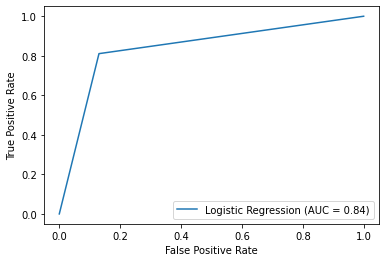

In [ ]:
# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_pred)
roc_auc = auc(fpr, tpr)

rocdisplay = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
rocdisplay.plot()

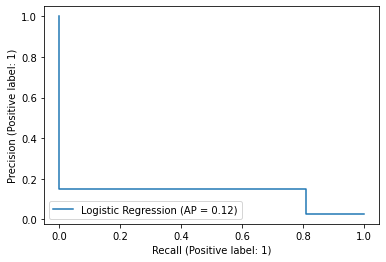

In [ ]:
# generate precision-recall graph
prdisplay = PrecisionRecallDisplay.from_predictions(y_test, lr_pred, name='Logistic Regression')

#### Logistic Regression Final Model Summary

The logistic regression performed similarly to the SVM model; it has a similiarly high rate of false positives, and low precision among those companies with true bankruptcy = 1.

### Naive Bayes

#### Hyperparameter Tuning

In [ ]:
params = {'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20]}

In [ ]:
grid_nb = GridSearchCV(ComplementNB(), params, scoring = 'roc_auc', verbose=1)

In [ ]:
grid_nb.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(estimator=ComplementNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20]},
             scoring='roc_auc', verbose=1)

In [ ]:
grid_nb.best_estimator_

ComplementNB(alpha=1)

In [ ]:
grid_nb.best_score_

0.8568187820544448

#### Naive Bayes Final Model

In [ ]:
# fit naive bayes model with best performing hyperparameters
nb_final = ComplementNB(alpha = 1).fit(X_train, y_train)

In [ ]:
# generate predictions on test data
nb_pred = nb_final.predict(X_test)

In [ ]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1327
           1       0.13      0.65      0.21        37

    accuracy                           0.87      1364
   macro avg       0.56      0.76      0.57      1364
weighted avg       0.97      0.87      0.91      1364



In [ ]:
print('Accuracy: ', accuracy_score(y_test, nb_pred))

Accuracy:  0.8687683284457478


In [ ]:
nb_cm = confusion_matrix(y_test, nb_pred)
print(nb_cm)

[[1161  166]
 [  13   24]]


In [ ]:
# from confusion matrix: count of each prediction result
nb_tn = nb_cm[0][0]
print('True Negatives: ', nb_tn)
nb_fn = nb_cm[1][0]
print('False Negatives: ', nb_fn)
nb_tp = nb_cm[1][1]
print('True Positives: ', nb_tp)
nb_fp = nb_cm[0][1]
print('False Positives: ', nb_fp)

True Negatives:  1161
False Negatives:  13
True Positives:  24
False Positives:  166


In [ ]:
# tpr
print('TPR: ', nb_tp/(nb_tp + nb_fn))
# fpr
print('FPR: ', nb_fp/(nb_fp + nb_tn))
# tnr
print('TNR: ', nb_tn/(nb_tn + nb_fp))
# fnr
print('FNR: ', nb_fn/(nb_fn + nb_tp))

TPR:  0.6486486486486487
FPR:  0.12509419743782968
TNR:  0.8749058025621703
FNR:  0.35135135135135137


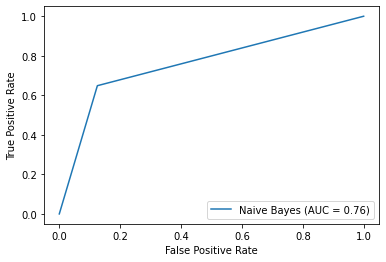

In [ ]:
# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb_pred)
roc_auc = auc(fpr, tpr)

rocdisplay = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Naive Bayes')
rocdisplay.plot()

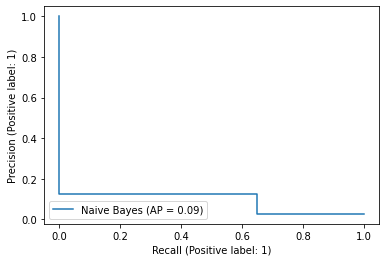

In [ ]:
# generate precision-recall graph
prdisplay = PrecisionRecallDisplay.from_predictions(y_test, nb_pred, name='Naive Bayes')

#### Naive Bayes Final Model Summary

The Naive Bayes model performed with accuracy consistent with the SVM and Logistic Regression models, and like these other models, had low precision among companies with true bankruptcy = 1.


### Modeling (Supervised) Conclusion

All three of these models performed poorly on this dataset. Given the proportion of the full dataset that has Bankruptcy? = 1 (less than 97%), I think that the poor performance of these models could be attributed to the imbalanced dataset (and imbalanced sample). Looking forward to the next portion of this exercise, where we will be testing additional classification techniques, I want to also experiment with oversampling/intentionally weighting the sample of the minority class (Bankruptcy? = 1) in order to train the model with more examples of the minority class. I also expect the tree-based modeling techniques we are exploring next week to perform more effectively on class-imbalanced data than the models discussed this week.

## Modeling - Trees and Forests Bagging, Boosting, Random Forests, Ensembles

Split the data into 80% training set and 20% validation set, then build three models:


*   Random Forest Classifier
*   Gradient Boosted Trees
*   Extra Trees

Conduct hyperparameter tuning for the following at a minimum:
*   n_estimators (number of trees)
*   max_features (max features considered for splitting a node)
*   max_depth (max number of levels in each tree)
*   splitting criteria (entropy or gini)

Compare models using F1-Score on the 20% validation set.

### Random Forest

#### Hyperparameter Tuning

In [ ]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [10, 50, 100, None],
          'max_features': ['auto', None],
          'n_estimators': [50, 100, 150]}

In [6]:
grid_rf = GridSearchCV(RandomForestClassifier(), params, scoring = 'roc_auc', verbose=1)

In [7]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100, None],
                         'max_features': ['auto', None],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=1)

In [8]:
grid_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=50)

In [9]:
grid_rf.best_score_

0.9441907085552597

#### Random Forest Final Model

In [10]:
# fit RF model with best performing hyperparameters
rf_final = RandomForestClassifier(criterion= 'entropy', max_depth= 50, max_features= None, n_estimators= 100).fit(X_train, y_train)

In [11]:
# generate predictions on test data
rf_pred = rf_final.predict(X_test)

In [12]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1327
           1       0.20      0.03      0.05        37

    accuracy                           0.97      1364
   macro avg       0.59      0.51      0.52      1364
weighted avg       0.95      0.97      0.96      1364



In [13]:
print('Accuracy: ', accuracy_score(y_test, rf_pred))

Accuracy:  0.9706744868035191


In [14]:
rf_cm = confusion_matrix(y_test, rf_pred)
print(rf_cm)

[[1323    4]
 [  36    1]]


In [15]:
# from confusion matrix: count of each prediction result
rf_tn = rf_cm[0][0]
print('True Negatives: ', rf_tn)
rf_fn = rf_cm[1][0]
print('False Negatives: ', rf_fn)
rf_tp = rf_cm[1][1]
print('True Positives: ', rf_tp)
rf_fp = rf_cm[0][1]
print('False Positives: ', rf_fp)

True Negatives:  1323
False Negatives:  36
True Positives:  1
False Positives:  4


In [16]:
# tpr
print('TPR: ', rf_tp/(rf_tp + rf_fn))
# fpr
print('FPR: ', rf_fp/(rf_fp + rf_tn))
# tnr
print('TNR: ', rf_tn/(rf_tn + rf_fp))
# fnr
print('FNR: ', rf_fn/(rf_fn + rf_tp))

TPR:  0.02702702702702703
FPR:  0.003014318010550113
TNR:  0.9969856819894499
FNR:  0.972972972972973


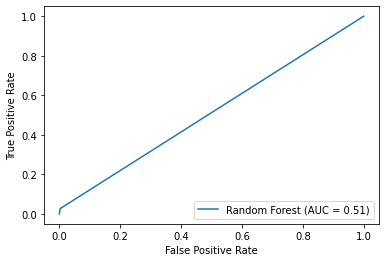

In [17]:
# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)

rocdisplay = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
rocdisplay.plot()

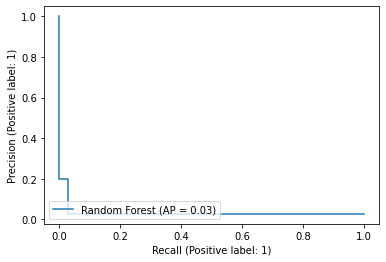

In [18]:
# generate precision-recall graph
prdisplay = PrecisionRecallDisplay.from_predictions(y_test, rf_pred, name='Random Forest')

#### Random Forest Final Model Summary

### Gradient Boosted Trees

#### Hyperparameter Tuning

In [19]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [20]:
params = {'max_depth': [10, 50, 100, None],
          'max_features': ['auto', None],
          'n_estimators': [50, 100, 150, 200]}

In [21]:
grid_gb = GridSearchCV(GradientBoostingClassifier(), params, scoring = 'roc_auc', verbose=1)

In [22]:
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [10, 50, 100, None],
                         'max_features': ['auto', None],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc', verbose=1)

In [23]:
grid_gb.best_estimator_

GradientBoostingClassifier(max_depth=10, max_features='auto', n_estimators=200)

In [24]:
grid_gb.best_score_

0.9300169838984734

#### Gradient Boosted Trees Final Model

In [25]:
# fit gradient boosted model with best performing hyperparameters
gb_final = GradientBoostingClassifier(max_depth=10, max_features='auto', n_estimators=200).fit(X_train, y_train)

In [26]:
# generate predictions on test data
gb_pred = gb_final.predict(X_test)

In [27]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1327
           1       0.45      0.14      0.21        37

    accuracy                           0.97      1364
   macro avg       0.72      0.57      0.60      1364
weighted avg       0.96      0.97      0.96      1364



In [28]:
print('Accuracy: ', accuracy_score(y_test, gb_pred))

Accuracy:  0.9721407624633431


In [29]:
gb_cm = confusion_matrix(y_test, gb_pred)
print(gb_cm)

[[1321    6]
 [  32    5]]


In [30]:
# from confusion matrix: count of each prediction result
gb_tn = gb_cm[0][0]
print('True Negatives: ', gb_tn)
gb_fn = gb_cm[1][0]
print('False Negatives: ', gb_fn)
gb_tp = gb_cm[1][1]
print('True Positives: ', gb_tp)
gb_fp = gb_cm[0][1]
print('False Positives: ', gb_fp)

True Negatives:  1321
False Negatives:  32
True Positives:  5
False Positives:  6


In [31]:
# tpr
print('TPR: ', gb_tp/(gb_tp + gb_fn))
# fpr
print('FPR: ', gb_fp/(gb_fp + gb_tn))
# tnr
print('TNR: ', gb_tn/(gb_tn + gb_fp))
# fnr
print('FNR: ', gb_fn/(gb_fn + gb_tp))

TPR:  0.13513513513513514
FPR:  0.00452147701582517
TNR:  0.9954785229841748
FNR:  0.8648648648648649


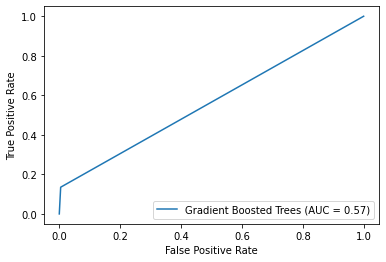

In [32]:
# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_pred)
roc_auc = auc(fpr, tpr)

rocdisplay = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Gradient Boosted Trees')
rocdisplay.plot()

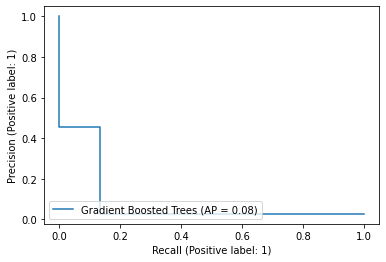

In [33]:
# generate precision-recall graph
prdisplay = PrecisionRecallDisplay.from_predictions(y_test, gb_pred, name='Gradient Boosted Trees')

#### Gradient Boosted Trees Final Model Summary

### Extra Trees

#### Hyperparameter Tuning

In [34]:
ExtraTreesClassifier().get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [10, 50, 100, None],
          'max_features': ['auto', None],
          'n_estimators': [50, 100, 150, 200]}

In [36]:
grid_et = GridSearchCV(ExtraTreesClassifier(), params, scoring = 'roc_auc', verbose = 1)

In [37]:
grid_et.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100, None],
                         'max_features': ['auto', None],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc', verbose=1)

In [1]:
grid_et.best_estimator_

NameError: ignored

In [ ]:
grid_et.best_score_

#### Extra Trees Final Model

In [ ]:
# fit Extra Trees model with best performing hyperparameters
et_final = ExtraTreesClassifier(C=1, class_weight='balanced', gamma=0.001, kernel='linear').fit(X_train, y_train)

In [ ]:
# generate predictions on test data
et_pred = et_final.predict(X_test)

In [ ]:
print(classification_report(y_test, et_pred))

In [ ]:
print('Accuracy: ', accuracy_score(y_test, et_pred))

In [ ]:
et_cm = confusion_matrix(y_test, et_pred)
print(et_cm)

In [ ]:
# from confusion matrix: count of each prediction result
et_tn = et_cm[0][0]
print('True Negatives: ', et_tn)
et_fn = et_cm[1][0]
print('False Negatives: ', et_fn)
et_tp = et_cm[1][1]
print('True Positives: ', et_tp)
et_fp = et_cm[0][1]
print('False Positives: ', et_fp)

In [ ]:
# tpr
print('TPR: ', et_tp/(et_tp + et_fn))
# fpr
print('FPR: ', et_fp/(et_fp + et_tn))
# tnr
print('TNR: ', et_tn/(et_tn + et_fp))
# fnr
print('FNR: ', et_fn/(et_fn + et_tp))

In [ ]:
# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, et_pred)
roc_auc = auc(fpr, tpr)

rocdisplay = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Extra Trees')
rocdisplay.plot()

In [ ]:
# generate precision-recall graph
prdisplay = PrecisionRecallDisplay.from_predictions(y_test, et_pred, name='Extra Trees')

#### Extra Trees Final Model Summary

### Modeling (Tree-based Methods) Conclusion